# <center><font color="blue">Detailed Exploratory Data Analysis with Python</font>


In [1]:
# import necessary libraries

import pandas as pd
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 2)
%matplotlib inline
sns.set(palette = "pastel")
sns.set()

### <font color="blue"> Q 1.1 </font>

In [2]:
# Read the data from the given file and create a data frame.

data = pd.read_excel("births.xlsx")

data.head()

,birth_year,gender,ethnicity,first_name,frequency
0,2011,female,hispanic,geraldine,13
1,2011,female,hispanic,gia,21
2,2011,female,hispanic,gianna,49
3,2011,female,hispanic,giselle,38
4,2011,female,hispanic,grace,36


In [3]:
# data inspection, data cleaning, data reformatting 

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37537 entries, 0 to 37536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  37537 non-null  int64 
 1   gender      37537 non-null  object
 2   ethnicity   37537 non-null  object
 3   first_name  37537 non-null  object
 4   frequency   37537 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [4]:
data.isnull()

,birth_year,gender,ethnicity,first_name,frequency
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
37532,False,False,False,False,False
37533,False,False,False,False,False
37534,False,False,False,False,False
37535,False,False,False,False,False


In [5]:
# Number of rows and columns
data.shape

(37537, 5)

In [6]:
# Number of cells
data.size

187685

In [7]:
data.frequency.describe()


count    37537.00
mean        33.91
std         38.96
min         10.00
25%         13.00
50%         20.00
75%         36.00
max        426.00
Name: frequency, dtype: float64

## <font color="purple"> Comment: The are 37537 rows and data.info() shows that there are no null values. The most frequent name has 426 occurences and the least frequent one has 10 occurrences. </font>

### <font color="blue"> Q1.2: Total babies born </font>

In [8]:
print('The first_name column has', data.first_name.isnull().sum(),'missing values.')

print('There were', data.frequency.sum(), 'babies born between', data.birth_year.max(),'and',data.birth_year.min())


The first_name column has 0 missing values.
There were 1273006 babies born between 2017 and 2011


### <font color="purple"> Comment: The first_name column has 0 missing values. After adding the frequencies you can see there were 1.273.006 babies born between 2017 and 2011. </font>

### <font color="blue"> Q1.3: Female vs Male babies </font>

gender
female    558728
male      714278
Name: frequency, dtype: int64

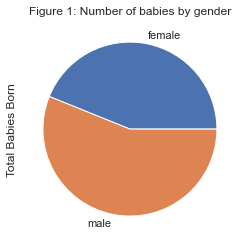

In [9]:
# Babies by gender

data.groupby('gender').frequency.sum().plot(kind="pie", ylabel='Total Babies Born', title = "Figure 1: Number of babies by gender")

data.groupby('gender').frequency.sum()


### <font color="purple"> Comment: There were 558.728 females born and 714.278 males born. </font>

### <font color="blue"> Q1.4: Babies born each year </font>

,frequency
birth_year,
2011,269829
2012,274122
2013,262686
2014,262634
2015,69600
2016,68740
2017,65395


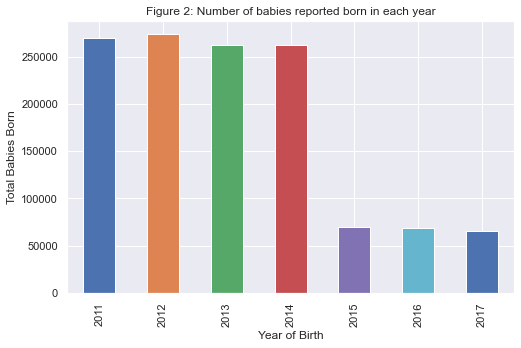

In [10]:
# Number of babies born each year without gender and ethnicity

#Show as a visual

data.groupby('birth_year').frequency.sum().plot(kind="bar", figsize= (8,5), title = "Figure 2: Number of babies reported born in each year", ylabel='Total Babies Born', xlabel='Year of Birth', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C9'])


#Show as a table
num_babies = data.groupby('birth_year').frequency.sum()
df = pd.DataFrame(num_babies)
df

### <font color="purple"> Comment: The number of babies reported born has shows a sharp decline after 2014. </font>

### <font color="blue"> Q1.5: Babies born per ethnicity </font>

,frequency
ethnicity,
asian and paci,40085
asian and pacific islander,131935
black non hisp,39426
black non hispanic,145804
hispanic,425239
white non hisp,103829
white non hispanic,386688


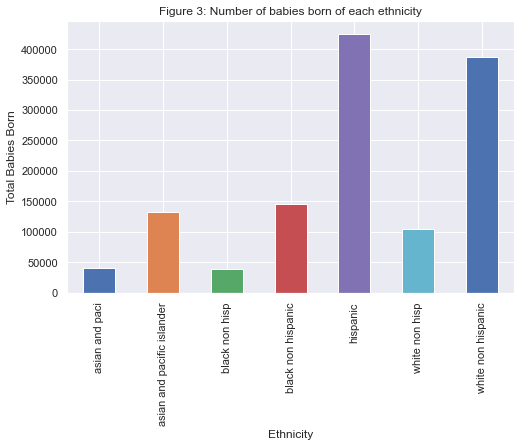

In [11]:
#Create a chart to show the number of babies born of each ethnicity, ignoring year, and gender

data.groupby('ethnicity').frequency.sum().plot(kind="bar", figsize= (8,5), title = "Figure 3: Number of babies born of each ethnicity", ylabel='Total Babies Born', xlabel='Ethnicity', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C9'])

# Create a table

ethnic = data.groupby('ethnicity').frequency.sum()
df = pd.DataFrame(ethnic)
df

### <font color="purple"> Comment: There are duplicated groups that are spelled differently. This is unnecessarily dividing the data. </font>

### <font color="blue"> Q1.6: Ten most popular names </font>

In [12]:
#Without gender, year and ethnicity
print('The ten most popular names are:')

data.groupby('first_name').frequency.sum().sort_values(ascending=False)[:10]

The ten most popular names are:


first_name
ethan       12071
jacob       11762
jayden      11165
daniel      10035
matthew      9983
david        9920
michael      9796
sophia       9578
isabella     9291
aiden        9276
Name: frequency, dtype: int64

### <font color="blue"> Q1.7: Ten most popular female names </font>

In [13]:
# Without year and ethnicity

filter1 = (data.gender == 'female')
females = data[filter1]

data[filter1].groupby('first_name').frequency.sum().sort_values(ascending=False)[:10]


first_name
sophia      9578
isabella    9291
emma        8581
olivia      8561
mia         8094
emily       7691
leah        6756
chloe       6201
madison     6161
ava         6092
Name: frequency, dtype: int64

### <font color="blue"> Q1.8: Popularity of name David </font>

birth_year
2011    2014
2012    2288
2013    2332
2014    1758
2015     545
2016     476
2017     507
Name: frequency, dtype: int64

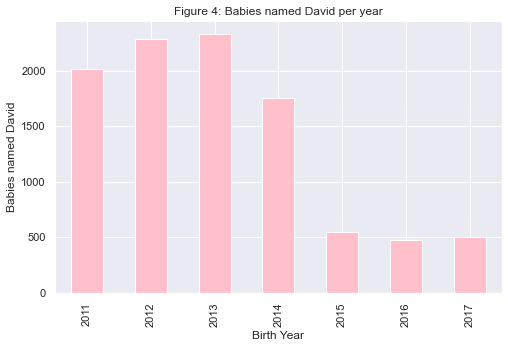

In [14]:
#create filter with name 
filter2 = (data.first_name == 'david')
name = data[filter2]

#group by year, summarize frequencies and plot chart 
name.groupby('birth_year').frequency.sum().plot(kind='bar',figsize= (8,5), title = "Figure 4: Babies named David per year", xlabel='Birth Year', ylabel= 'Babies named David', color='pink')

name.groupby('birth_year').frequency.sum()


#### <font color="blue"> Trendline </font>

<AxesSubplot:title={'center':'Figure 5: Babies named David per year'}, xlabel='Birth Year', ylabel='Number of babies named David'>

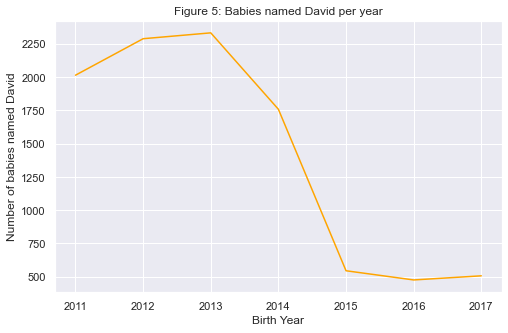

In [15]:
name.groupby('birth_year').frequency.sum().plot(xlabel='Birth Year', ylabel= 'Number of babies named David', figsize= (8,5), title = "Figure 5: Babies named David per year", color = 'orange')


### <font color="purple"> Comment: David used to be a quite popular name from year 2011-2014 as it can be seen in Figure 4, but after 2014 it has been experiencing a sharp decline in number of babies that are given this name at birth, which can be observed in Figure 5. Therefore, the data supports that the popularity of the name has gone down. However, there could be other reasons for the sharp decline such as failure in data recollection.  </font>

### <font color="blue"> Q1.9: Distinct First Names </font>

In [16]:
print("The number of distinct first names is", data.first_name.nunique())

The number of distinct first names is 1832


### <font color="blue"> Q1.10: Distinct first names by gender </font>

In [17]:
print("The number of distinct first names by gender is: \n", data.groupby('gender')['first_name'].nunique())


The number of distinct first names by gender is: 
 gender
female    1011
male       852
Name: first_name, dtype: int64


In [18]:
print("The total number of distinct first names by gender is:", data.groupby('gender')['first_name'].nunique().sum())

The total number of distinct first names by gender is: 1863


### <font color="blue"> Q1.11: Distinct first names by gender </font>


### <font color="purple"> The answer to 1.9 is NOT consistent with the answer to 1.10. For 1.9 the number of distinct first names was 1.832 and for 1.10 it was 1863.  A possible explanation for this is that for question 1.9 all names were grouped together and only one ocurrance of each name was counted. In question 1.10, the data was grouped by gender, causing certain gender neutral names to appear both in the female group, as well as the male group, which ultimately increases the count of distinct values, since they are now unique within their group. </font>

### <font color="blue"> Q1.12: Babies by ethnicity </font>

In [19]:
#total number of babies of each ethnicity born in each year

print('Subtotals by ethnicity as well as year:')
pd.crosstab(data.ethnicity, data.birth_year, values=data.frequency, aggfunc="sum", margins=True)



Subtotals by ethnicity as well as year:


birth_year,2011,2012,2013,2014,2015,2016,2017,All
ethnicity,,,,,,,,
asian and paci,NaN,40085.0,NaN,NaN,NaN,NaN,NaN,40085
asian and pacific islander,32217.0,NaN,34760.0,36536.0,9584.0,9973.0,8865.0,131935
black non hisp,NaN,39426.0,NaN,NaN,NaN,NaN,NaN,39426
black non hispanic,42045.0,NaN,38548.0,37728.0,9637.0,9147.0,8699.0,145804
hispanic,96743.0,90782.0,86585.0,85529.0,22813.0,22086.0,20701.0,425239
white non hisp,NaN,103829.0,NaN,NaN,NaN,NaN,NaN,103829
white non hispanic,98824.0,NaN,102793.0,102841.0,27566.0,27534.0,27130.0,386688
All,269829.0,274122.0,262686.0,262634.0,69600.0,68740.0,65395.0,1273006


In [20]:
data.groupby('ethnicity').frequency.sum()

ethnicity
asian and paci                 40085
asian and pacific islander    131935
black non hisp                 39426
black non hispanic            145804
hispanic                      425239
white non hisp                103829
white non hispanic            386688
Name: frequency, dtype: int64

In [21]:
# Total number of babies of each ethnicity born in each year
data.groupby(['ethnicity','birth_year']).frequency.sum()

ethnicity                   birth_year
asian and paci              2012           40085
asian and pacific islander  2011           32217
                            2013           34760
                            2014           36536
                            2015            9584
                            2016            9973
                            2017            8865
black non hisp              2012           39426
black non hispanic          2011           42045
                            2013           38548
                            2014           37728
                            2015            9637
                            2016            9147
                            2017            8699
hispanic                    2011           96743
                            2012           90782
                            2013           86585
                            2014           85529
                            2015           22813
                            20


### <font color="purple"> The reason why there are multiple cells with no values is because the attribute name for ethnicity was abreviated for the year 2012. Instead of being "asian and pacific islander", "black non hispanic" and "white non hispanic" it was shortened to "asian and paci", "black non hisp" and "white non hisp". Which causes Python to read them as separate groups. The only group that wasn't affected was "hispanic", which contains data for 2012 under the same name. </font>

### <font color="blue"> 1.13 Female vs Male babies born in NYC </font>

In [22]:
pd.crosstab(data.gender, data.birth_year, 
            values=data.frequency, aggfunc="sum", margins=True)


birth_year,2011,2012,2013,2014,2015,2016,2017,All
gender,,,,,,,,
female,117700,119406,115183,116590,30592,30360,28897,558728
male,152129,154716,147503,146044,39008,38380,36498,714278
All,269829,274122,262686,262634,69600,68740,65395,1273006



#### <font color="purple"> It's possible to identify a trend over time in which there are less women being born than men year after year.  </font>

### <font color="blue"> 2. Analyze the data in house_prices.xlsx </font>


In [23]:
# Read the data from the given file and create a data frame.

data2 = pd.read_excel("house_prices.xlsx")

data2.head()

,address,price,acres,size_sqft,age,rooms,baths,garages
0,9 Sycamore Road,466.0,0.23,2448,46,7,3.5,2
1,21 Jefferson St,364.0,0.22,1942,51,7,2.5,1
2,38 Hitching Post Lane,429.0,0.16,2073,29,5,3.0,2
3,4 Poppy Lane,548.4,0.46,2707,18,8,2.5,1
4,5 Daniel Drive,405.9,0.25,2042,46,7,1.5,1


In [24]:
# Read and inspect the dataset before you do any analysis

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    30 non-null     object 
 1   price      30 non-null     float64
 2   acres      30 non-null     float64
 3   size_sqft  30 non-null     int64  
 4   age        30 non-null     int64  
 5   rooms      30 non-null     int64  
 6   baths      30 non-null     float64
 7   garages    30 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 2.0+ KB


In [25]:
data2.isnull()

,address,price,acres,size_sqft,age,rooms,baths,garages
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [26]:
# Number of rows and columns
data2.shape

(30, 8)

In [27]:
# Number of cells
data2.size

240

In [28]:
data2.describe()

,price,acres,size_sqft,age,rooms,baths,garages
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,389.85,0.25,1978.83,49.93,6.83,2.00,0.80
std,120.39,0.14,550.88,22.49,1.49,0.69,0.81
min,217.70,0.09,1008.00,7.00,5.00,1.00,0.00
25%,314.33,0.15,1622.25,41.75,6.00,1.62,0.00
50%,363.75,0.20,1992.00,47.00,7.00,2.00,1.00
75%,438.52,0.27,2205.50,54.00,7.75,2.50,1.00
max,749.74,0.65,3202.00,97.00,11.00,3.50,2.00


In [29]:
#scaled price up
data2["price"] = 1000 * data2["price"]
data2

,address,price,acres,size_sqft,age,rooms,baths,garages
0,9 Sycamore Road,466000.0,0.23,2448,46,7,3.5,2
1,21 Jefferson St,364000.0,0.22,1942,51,7,2.5,1
2,38 Hitching Post Lane,429000.0,0.16,2073,29,5,3.0,2
3,4 Poppy Lane,548400.0,0.46,2707,18,8,2.5,1
4,5 Daniel Drive,405900.0,0.25,2042,46,7,1.5,1
5,15 Francis Terrace,374100.0,0.23,2089,88,7,2.0,0
6,23 Guilfoy Street,315000.0,0.18,1433,48,7,2.0,0
7,17 Carlyle Drive,749740.0,0.50,2991,7,9,2.5,1
8,8 Craft Avenue,217700.0,0.22,1008,52,5,1.0,0
9,22 Beechwood Ct.,635700.0,0.13,3202,15,8,2.5,2


### <font color="blue"> 2.1 House Prices </font>


In [30]:
# Summarize house prices in the community. Add an appropriate chart.
data2.price.describe()

count        30.00
mean     389849.33
std      120388.10
min      217700.00
25%      314325.00
50%      363750.00
75%      438525.00
max      749740.00
Name: price, dtype: float64

Text(0.5, 1.0, 'Figure 6: Distribution of price')

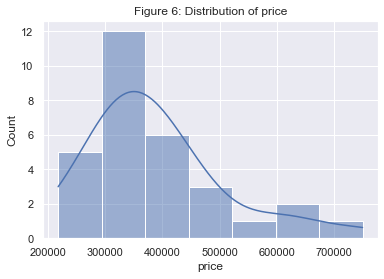

In [31]:
sns.histplot(data=data2, stat='count', x="price", kde=True).set_title('Figure 6: Distribution of price')

### <font color="purple"> Comment: The average price of homes in the community is 389,849. When visualized as an histogram, the distribution of price is skewed to the right. This shape indicates the presence of outliers, that are greater than the mode.</font>

## <font color="blue"> 2.2 Variation in house prices vs Number of rooms </font>

Text(0.5, 1.0, 'Figure 7: Line plot of Variation of price per number of rooms')

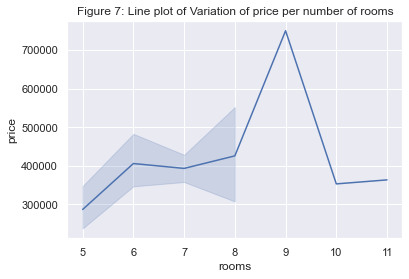

In [32]:
sns.lineplot(data=data2, x="rooms", y="price").set_title('Figure 7: Line plot of Variation of price per number of rooms')


### <font color="purple"> As the number of rooms in the house increases, surprisingly, it doesn't seem to have a significant impact on the price. There is one outlier that can be clearly identified, however if ignored, the price data points remain constant regardless of changes in the number of rooms. </font>

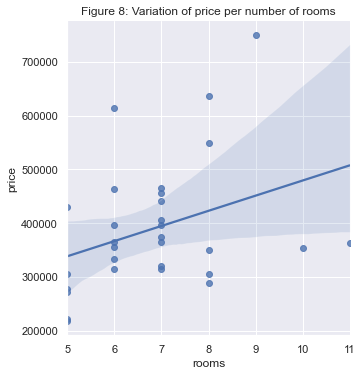

Correlation is: 0.34795064838071754


In [33]:
sns.lmplot(x='rooms', y='price', data=data2)
plt.title('Figure 8: Variation of price per number of rooms')
plt.show()
print('Correlation is:',data2.rooms.corr(data2.price))


### <font color="purple"> I also chose to draw a Linear Regression model (Figure 8) because it involves the determination of the degree of relationship in the patterns of variation, and it appears to not be too significant. Furthermore, the correlation is only 0.34, which indicates that an increase in the number rooms, won't be highly correlated to an increase in price. </font> 

## <font color="blue"> Q.2.3 Relation between price and other attributes</font>.

## Square Feet and Price

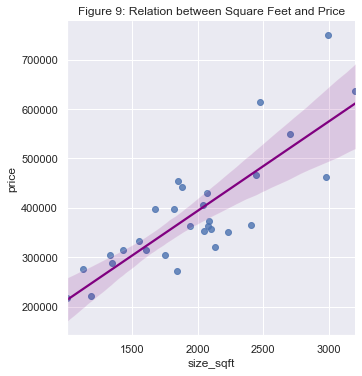

Correlation is: 0.8281926114902163


In [34]:
# Scatterplot with regression line
sns.lmplot(x='size_sqft', y='price', data=data2, height=5, line_kws={'color': 'purple'})

plt.title('Figure 9: Relation between Square Feet and Price')
plt.show()
print('Correlation is:',data2.size_sqft.corr(data2.price))

### <font color="purple"> The Linear Regression model in Figure 9, shows a very strong positive correlation between Price and Square Feet, which indicates that the bigger the house is, the more expensive it will be. These variables have a correlation coefficient of 0.82. </font> 

##  Acres and Price

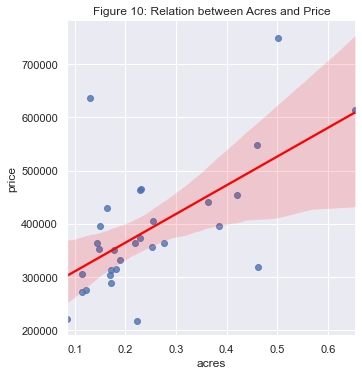

Correlation is: 0.6139631731178178


In [35]:
# Scatterplot with regression line
sns.lmplot(x='acres', y='price', data=data2, height=5, line_kws={'color': 'red'})

plt.title('Figure 10: Relation between Acres and Price')
plt.show()
print('Correlation is:',data2.acres.corr(data2.price))

### <font color="purple"> The model in Figure 10, shows a strong positive correlation between Acres and Price, which means that the bigger the land area used, the more expensive the property will be. These variables have a correlation coefficient of 0.61. It's not as strong as Square Feet, but still significant. </font> 

## Age and price

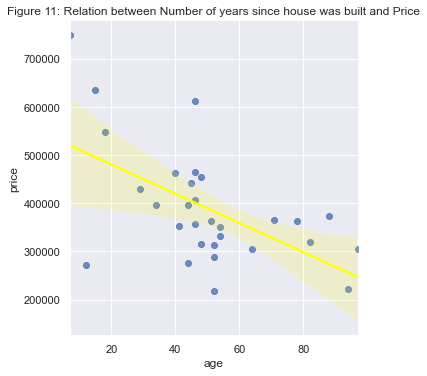

Correlation is: -0.56703926157939


In [36]:
sns.lmplot(x='age', y='price', data=data2, height=5, line_kws={'color': 'yellow'})

plt.title('Figure 11: Relation between Number of years since house was built and Price')
plt.show()
print('Correlation is:',data2.age.corr(data2.price))

### <font color="purple"> Figure 11, shows a negative moderate correlation between the age of the house and the price, as the number of years increases the price drops. Which means that the older the house is, the cheaper it will be. The correlation is -0.56.</font> 

## Number of Rooms and Price

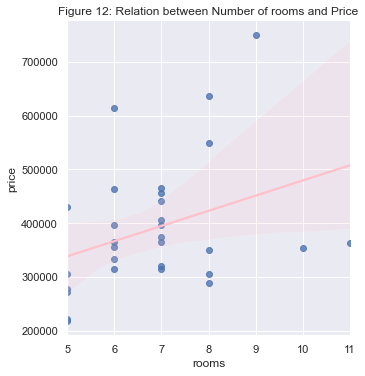

Correlation is: 0.34795064838071754


In [37]:
sns.lmplot(x='rooms', y='price', data=data2, height=5, line_kws={'color': 'pink'})

plt.title('Figure 12: Relation between Number of rooms and Price')
plt.show()
print('Correlation is:',data2.rooms.corr(data2.price))

### <font color="purple"> The chart in figure 12, shows that there is a weak correlation between number of rooms and price, as we had already seen previously for question 2.2, and in figures 7 and 8. Number of rooms doesn't seem to be a strong determinant of house price. </font> 

## Number of Bathrooms and Price

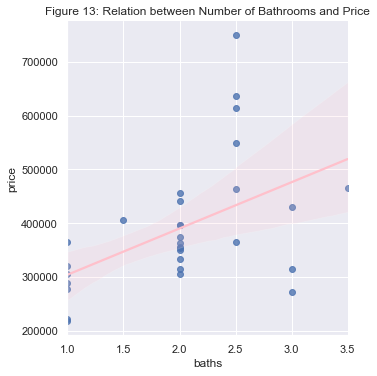

Correlation is: 0.49674060083719346


In [38]:
sns.lmplot(x='baths', y='price', data=data2, height=5, line_kws={'color': 'pink'})

plt.title('Figure 13: Relation between Number of Bathrooms and Price')
plt.show()
print('Correlation is:',data2.baths.corr(data2.price))

Text(0.5, 1.0, 'Figure 14: Line plot of Variation of price per number of baths')

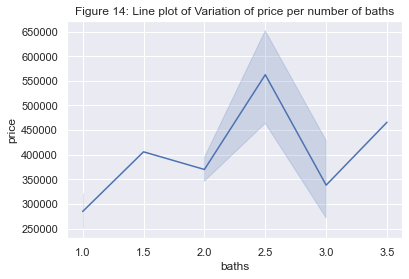

In [39]:
sns.lineplot(data=data2, x="baths", y="price").set_title('Figure 14: Line plot of Variation of price per number of baths')

### <font color="purple"> The model in Figure 13, shows a moderate correlation between number of bathrooms in the house and price, but it's also possible to identify multiple outlier values that could be impacting the results. These variables have a correlation coefficient of 0.49.  </font> 

## Number of car garages in the house and Price

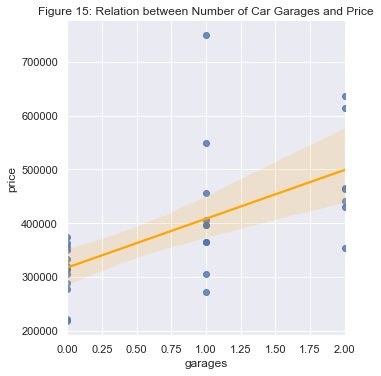

Correlation is: 0.6066358937652766


In [40]:
sns.lmplot(x='garages', y='price', data=data2, height=5, line_kws={'color': 'orange'})

plt.title('Figure 15: Relation between Number of Car Garages and Price')
plt.show()
print('Correlation is:',data2.garages.corr(data2.price))



### <font color="purple"> The model in Figure 15, shows a moderate positive correlation between number of garages and price, which indicates that a house with one or two garages will be more expensive than a house with no garage. An increase in number of garages will most likely mean an increase in the price as well. These variables have a correlation coefficient of 0.60. It's not as strong as the one for Square Feet and Acres, but more significan than Number of Bathrooms and Number of Rooms.</font> 

## <font color="blue"> Q.2.4 Findings</font>

### Attributes with a stronger influence on price

### <font color="purple">  After a thorough analysis of all attributes and their relation to price. The attribute that has the strongest influence on price is Square Feet of living space with a high correlation coefficient of 0.82, followed by Acres and Garages with a moderate correlation coefficient of 0.61 and 0.60, respectively.</font> 

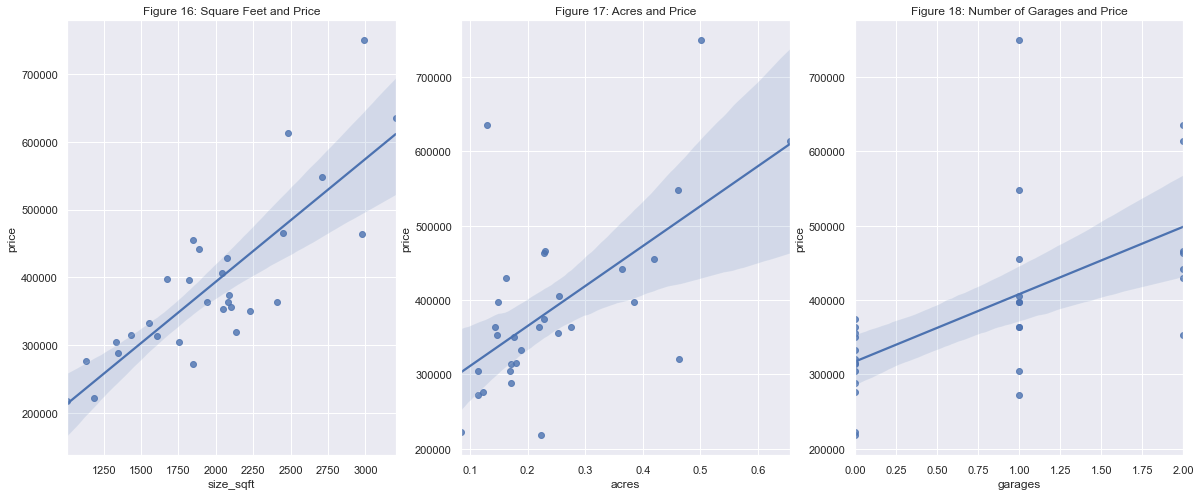

The correlation between Square Feet and Price is: 0.8281926114902163
The correlation between Acres and Price is: 0.6139631731178178
The correlation between number of Garages and Price is: 0.6066358937652766


In [49]:
fig, axes = plt.subplots(ncols=3)
sns.regplot(x='size_sqft', y='price', data=data2, ax=axes[0]).set(title='Figure 16: Square Feet and Price')
sns.regplot(x='acres', y='price', data=data2, ax=axes[1]).set(title='Figure 17: Acres and Price')
sns.regplot(x='garages', y='price', data=data2, ax=axes[2]).set(title='Figure 18: Number of Garages and Price')
fig.set_size_inches(20, 8)

plt.show()

print('The correlation between Square Feet and Price is:',data2.size_sqft.corr(data2.price))
print('The correlation between Acres and Price is:',data2.acres.corr(data2.price))
print('The correlation between number of Garages and Price is:',data2.garages.corr(data2.price))


 
 ### <font color="purple">  Age, which refers to the number of years since the house was built, was found to have a moderate negative relationship with price.  </font> 


The correlation between Age and Price is: -0.56703926157939


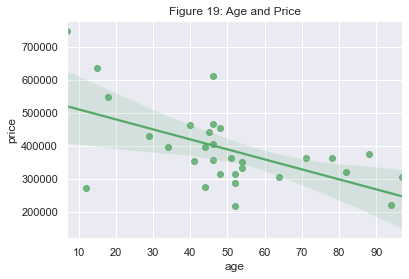

In [50]:
sns.regplot(x='age', y='price', data=data2, color="g").set(title='Figure 19: Age and Price')

print('The correlation between Age and Price is:',data2.age.corr(data2.price))

 ### <font color="purple">  Number of rooms and number of baths were found to have a weaker influence on price, with correlation coefficients of 0.34 and 0.49 respectively.  </font> 

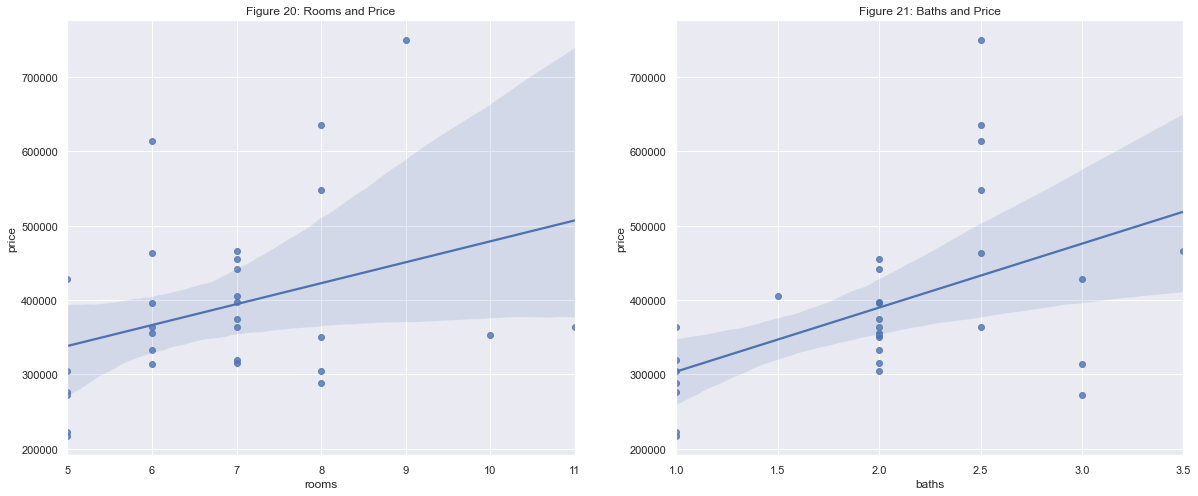

The correlation between Rooms and Price is: 0.34795064838071754
The correlation between Baths and Price is: 0.49674060083719346


In [51]:
fig, axes = plt.subplots(ncols=2)
sns.regplot(x='rooms', y='price', data=data2, ax=axes[0]).set(title='Figure 20: Rooms and Price')
sns.regplot(x='baths', y='price', data=data2, ax=axes[1]).set(title='Figure 21: Baths and Price')
fig.set_size_inches(20, 8)

plt.show()

print('The correlation between Rooms and Price is:',data2.rooms.corr(data2.price))
print('The correlation between Baths and Price is:',data2.baths.corr(data2.price))

 ### <font color="purple"> Lastly, and given all the previously performed analysis. The cheapest homes will be the ones that have less than 1,500 sqft, no garage and that are over 60 years old. And the most expensive ones will be the ones who are over 2,500 sqft,  have 2 or 3 garages and are less than 20 years old.  </font> 

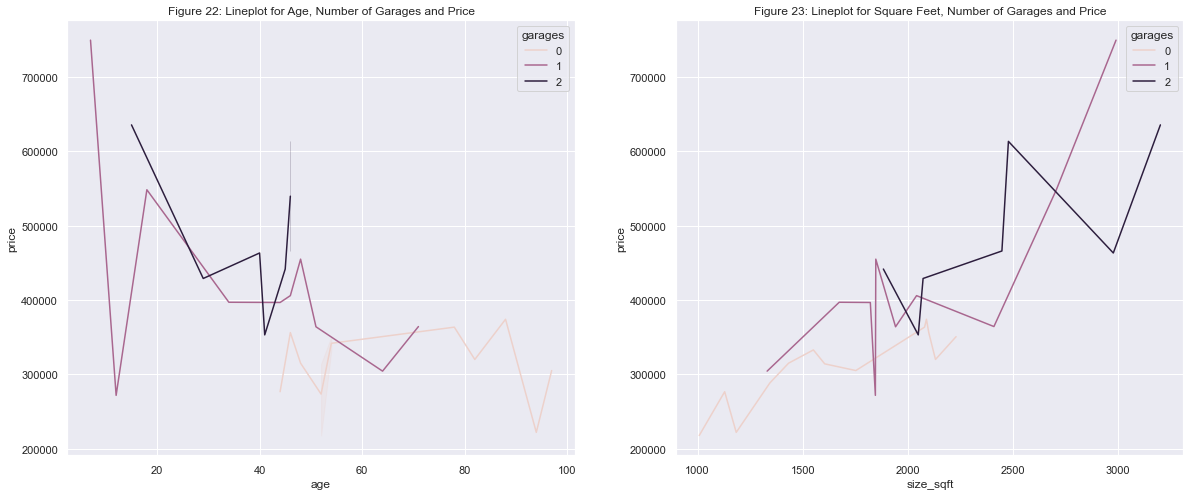

In [57]:
fig, axes = plt.subplots(ncols=2)
sns.lineplot(
    x="age", y="price", hue = "garages", 
    data=data2, ax=axes[0]).set(title='Figure 22: Lineplot for Age, Number of Garages and Price')

sns.lineplot(
    x="size_sqft", y="price", hue = "garages", 
    data=data2, ax=axes[1]).set(title='Figure 23: Lineplot for Square Feet, Number of Garages and Price')
fig.set_size_inches(20, 8)

plt.show()




In [58]:
import datetime
import getpass
print("\n", "Finished execution at ", datetime.datetime.now())
print(getpass.getuser())


 Finished execution at  2021-12-14 22:31:56.574896
zahyr
